In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import gdown
import os

In [2]:
# Download gambar dari Google Drive
url = 'https://drive.google.com/uc?id=1jwrW5d4AmUutLl0hUscOePqimXO8IBFS'
output = 'image.jpg'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1jwrW5d4AmUutLl0hUscOePqimXO8IBFS
To: C:\Windows\System32\image.jpg
100%|███████████████████████████████████████████████████████████████████████████████| 143k/143k [00:00<00:00, 1.77MB/s]


'image.jpg'

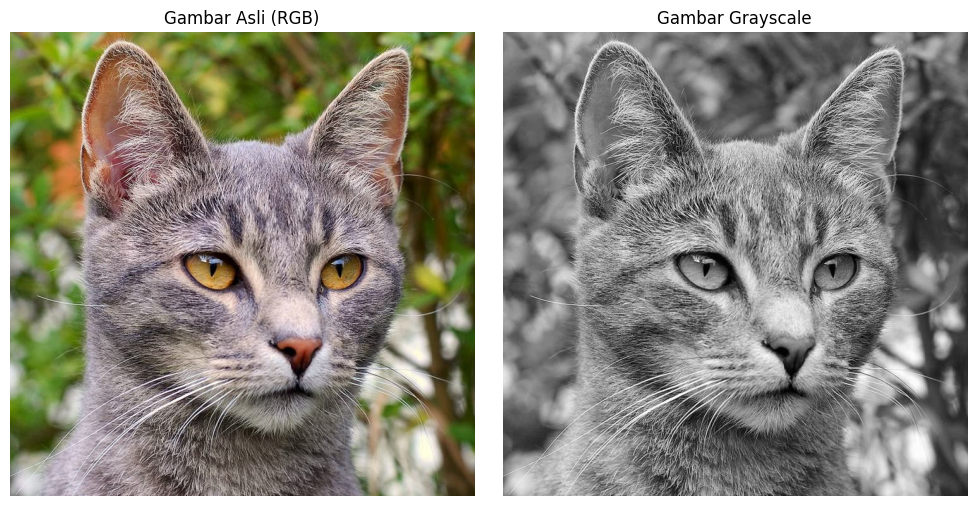

In [15]:
image = cv2.imread('image.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image_rgb)
axes[0].set_title("Gambar Asli (RGB)")
axes[0].axis("off")
axes[1].imshow(image_gray, cmap="gray")
axes[1].set_title("Gambar Grayscale")
axes[1].axis("off")

plt.tight_layout()
plt.show()

### Contrast Stretching

In [16]:
def contrast_stretching(image, r_min=None, r_max=None, s_min=0, s_max=255):
    """
    Melakukan contrast stretching pada gambar grayscale
    r_min, r_max: nilai minimum dan maksimum dalam gambar (jika None, maka akan dihitung otomatis)
    s_min, s_max: nilai output minimum dan maksimum setelah stretching
    """
    if r_min is None:
        r_min = np.min(image)
    if r_max is None:
        r_max = np.max(image)
    if r_max == r_min:
        return np.full_like(image, s_min)
    
    stretched = (image - r_min) * ((s_max - s_min) / (r_max - r_min)) + s_min
    return np.clip(stretched, s_min, s_max).astype(np.uint8)

stretched_image = contrast_stretching(gray_image)

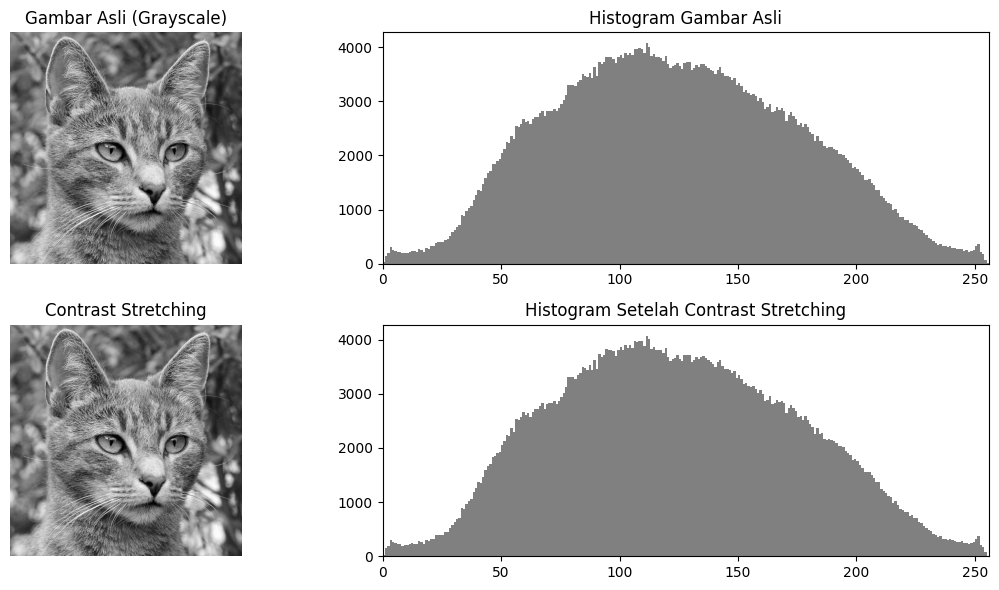

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Gambar Asli (Grayscale)")
axes[0, 0].axis("off")
axes[0, 1].hist(image_gray.flatten(), bins=256, range=[0, 256], color='gray')
axes[0, 1].set_title("Histogram Gambar Asli")
axes[0, 1].set_xlim([0, 256])

axes[1, 0].imshow(stretched_image, cmap='gray')
axes[1, 0].set_title("Contrast Stretching")
axes[1, 0].axis("off")
axes[1, 1].hist(stretched_image.flatten(), bins=256, range=[0, 256], color='gray')
axes[1, 1].set_title("Histogram Setelah Contrast Stretching")
axes[1, 1].set_xlim([0, 256])

plt.tight_layout()
plt.show()

### Intensity-Level Slicing

In [22]:
def intensity_level_slicing(image, lower_bound, upper_bound, foreground_value=255, background_value=0, highlight_only=False):
    """
    Melakukan intensity-level slicing pada gambar grayscale
    lower_bound, upper_bound: batas bawah dan atas untuk slicing
    foreground_value: nilai pixel untuk area yang di-slice
    background_value: nilai pixel untuk area di luar slice
    highlight_only: jika True, hanya menyoroti daerah yang di-slice, jika False, mengubah seluruh gambar
    """
    if highlight_only:
        result = image.copy()
        mask = (image >= lower_bound) & (image <= upper_bound)
        result[mask] = foreground_value
        return result
    else:
        result = np.full_like(image, background_value)
        mask = (image >= lower_bound) & (image <= upper_bound)
        result[mask] = foreground_value
        return result

In [23]:
# Melakukan intensity-level slicing dengan beberapa parameter berbeda
# 1. Slicing dengan highlight (menyoroti area tertentu)
slice_highlight = intensity_level_slicing(gray_image, 100, 180, 255, 0, True)

# 2. Slicing dengan dua level (hitam-putih)
slice_bw = intensity_level_slicing(gray_image, 100, 180, 255, 0, False)

# 3. Slicing multi-level (tiga level)
def multi_level_slicing(image):
    result = np.zeros_like(image)
    mask1 = (image >= 0) & (image < 85)
    result[mask1] = 50
    mask2 = (image >= 85) & (image < 170)
    result[mask2] = 150
    mask3 = (image >= 170) & (image <= 255)
    result[mask3] = 250
    return result
    
slice_multi = multi_level_slicing(gray_image)

(-0.5, 735.5, 735.5, -0.5)

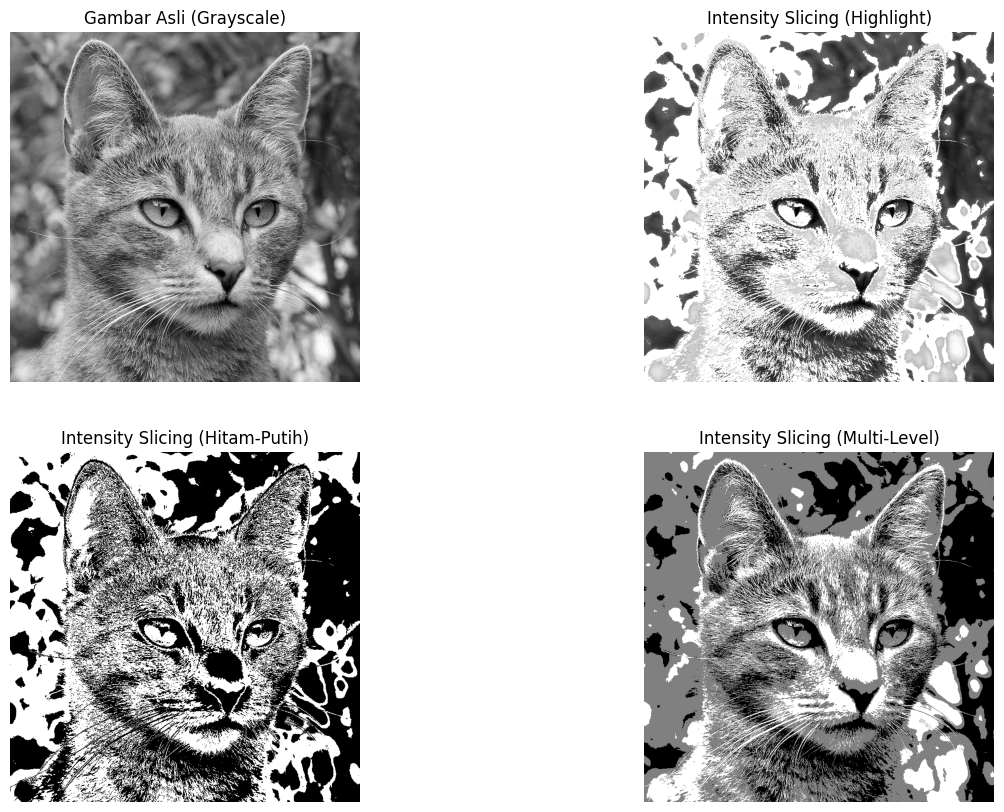

In [24]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.title('Gambar Asli (Grayscale)')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(222)
plt.title('Intensity Slicing (Highlight)')
plt.imshow(slice_highlight, cmap='gray')
plt.axis('off')

plt.subplot(223)
plt.title('Intensity Slicing (Hitam-Putih)')
plt.imshow(slice_bw, cmap='gray')
plt.axis('off')

plt.subplot(224)
plt.title('Intensity Slicing (Multi-Level)')
plt.imshow(slice_multi, cmap='gray')
plt.axis('off')

In [25]:
# Fungsi untuk menampilkan profile line (horizontal dan vertikal)
def show_profile_lines(image, title):
    height, width = image.shape
    h_profile = image[height//2, :]
    v_profile = image[:, width//2]
    
    plt.figure(figsize=(15, 10))
    plt.suptitle(f'Profil Intensitas - {title}', fontsize=16)
    
    plt.subplot(221)
    plt.title('Gambar dengan garis profil')
    plt.imshow(image, cmap='gray')
    plt.axhline(y=height//2, color='r', linestyle='-')
    plt.axvline(x=width//2, color='g', linestyle='-')
    plt.axis('off')
    
    plt.subplot(222)
    plt.title('Histogram')
    plt.hist(image.flatten(), bins=256, range=[0, 256], color='gray')
    plt.xlim([0, 256])
    
    plt.subplot(223)
    plt.title('Profil Horizontal (merah)')
    plt.plot(h_profile, 'r-')
    plt.xlim([0, width])
    plt.ylim([0, 255])
    plt.grid()
    
    plt.subplot(224)
    plt.title('Profil Vertikal (hijau)')
    plt.plot(v_profile, 'g-')
    plt.xlim([0, height])
    plt.ylim([0, 255])
    plt.grid()

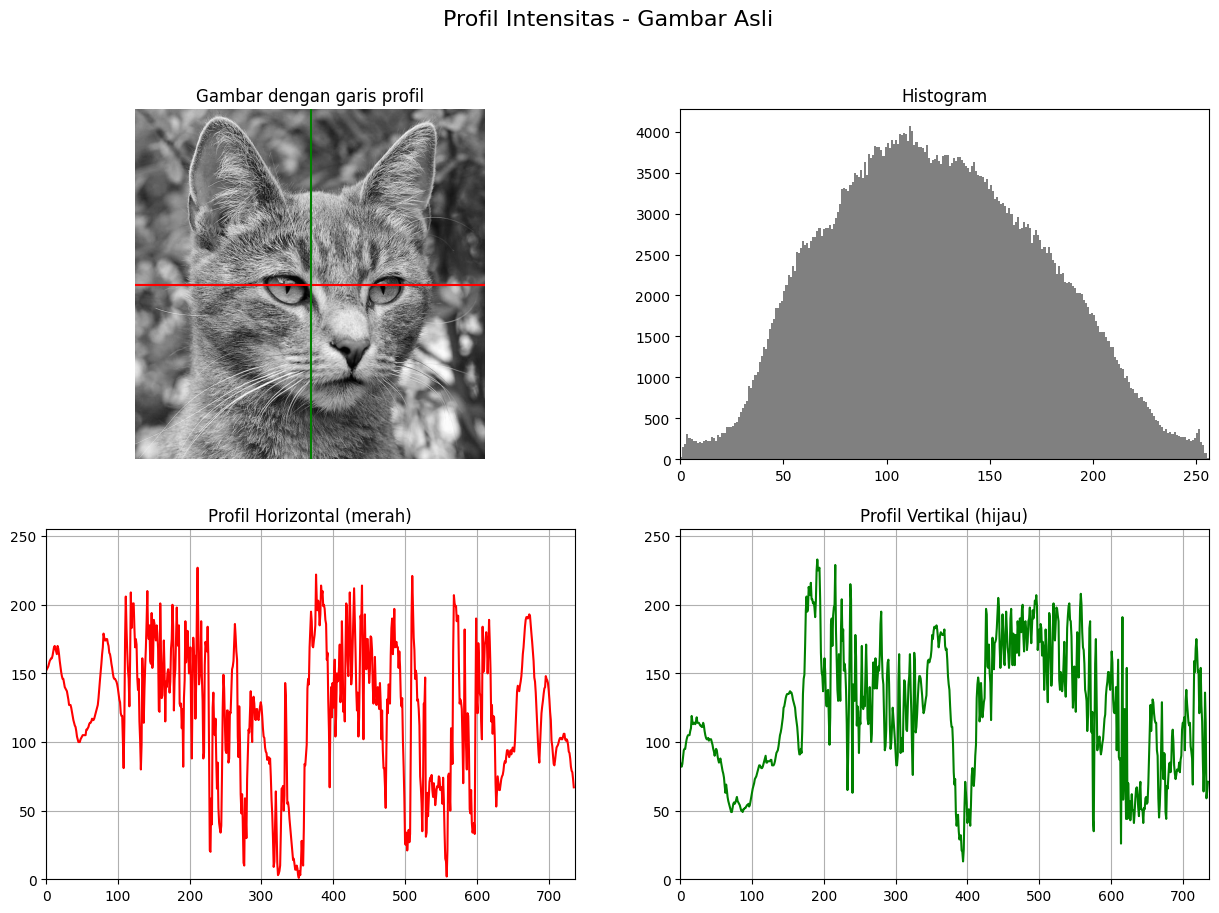

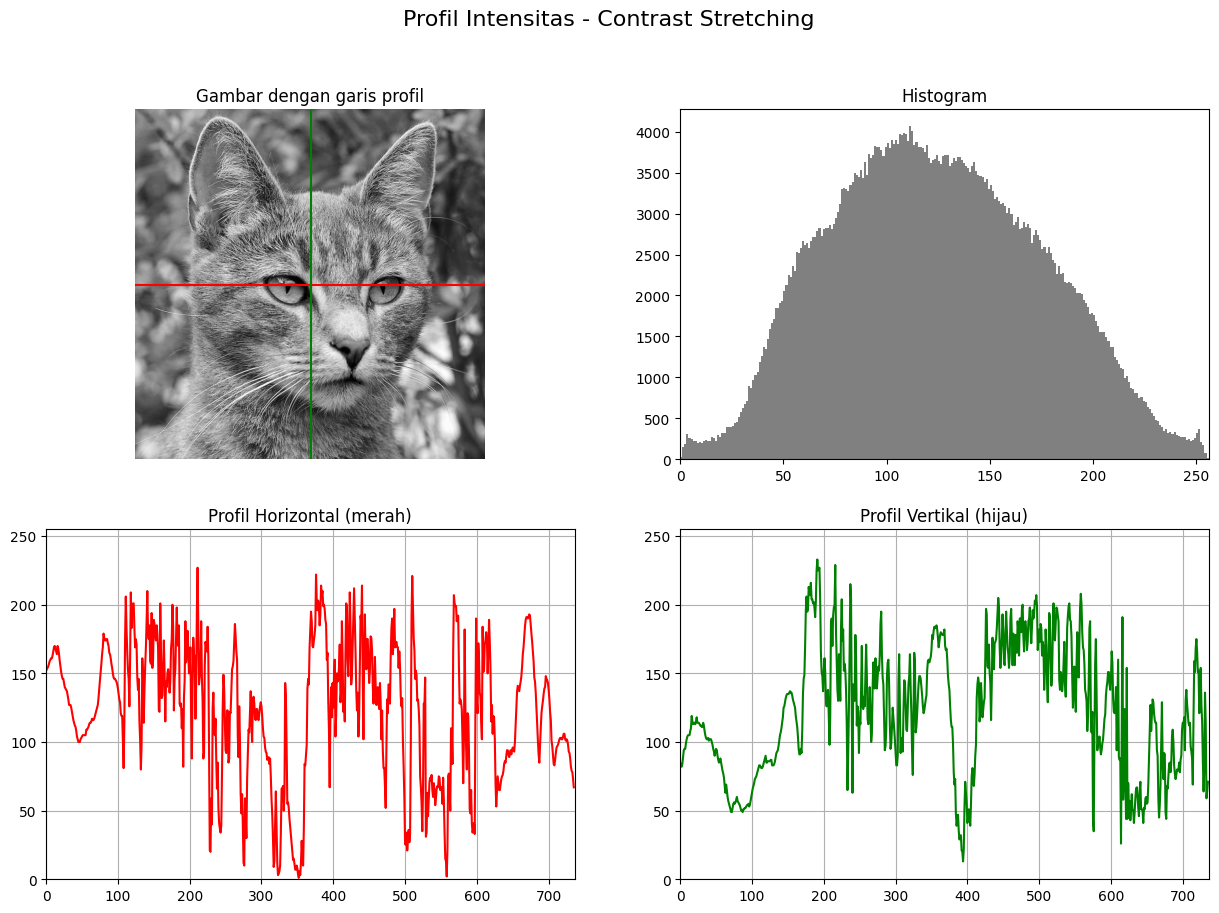

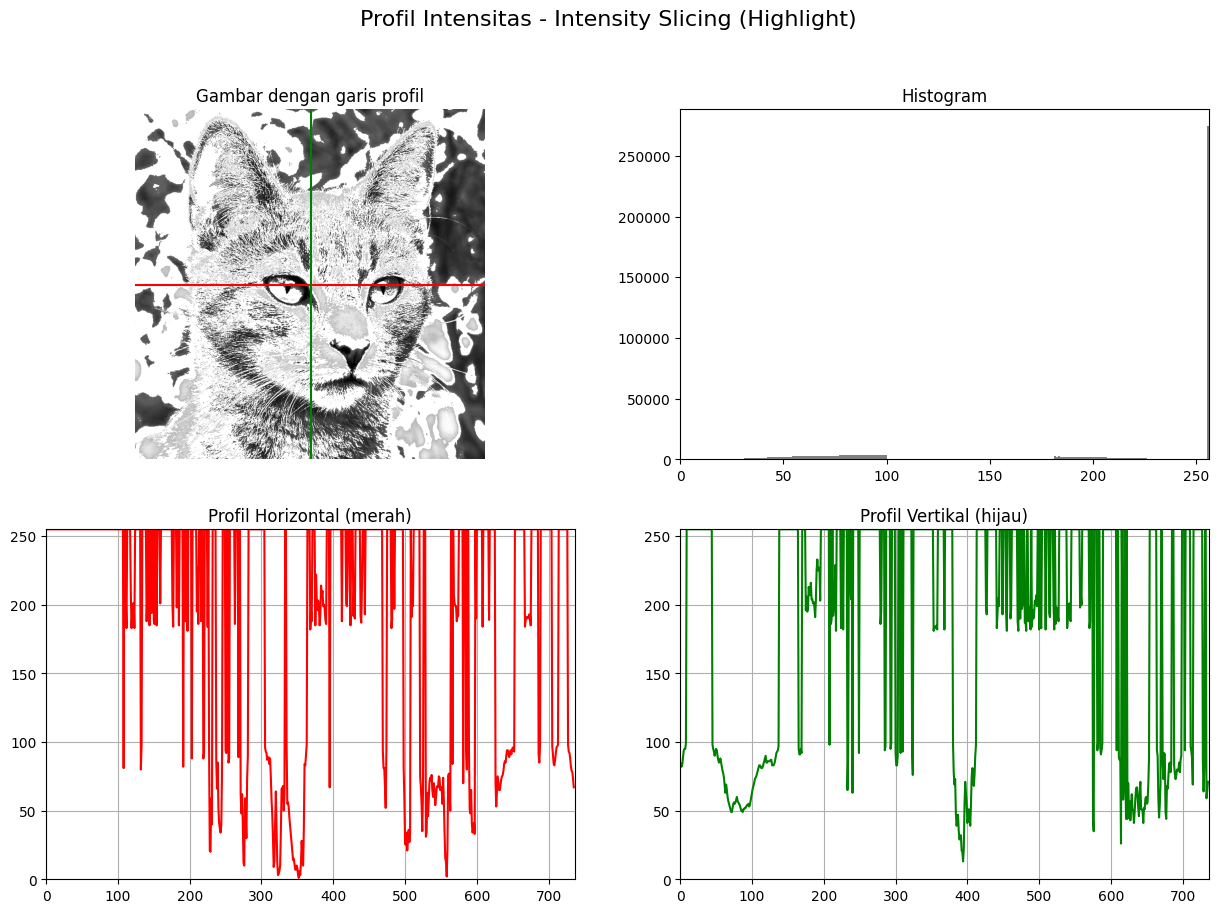

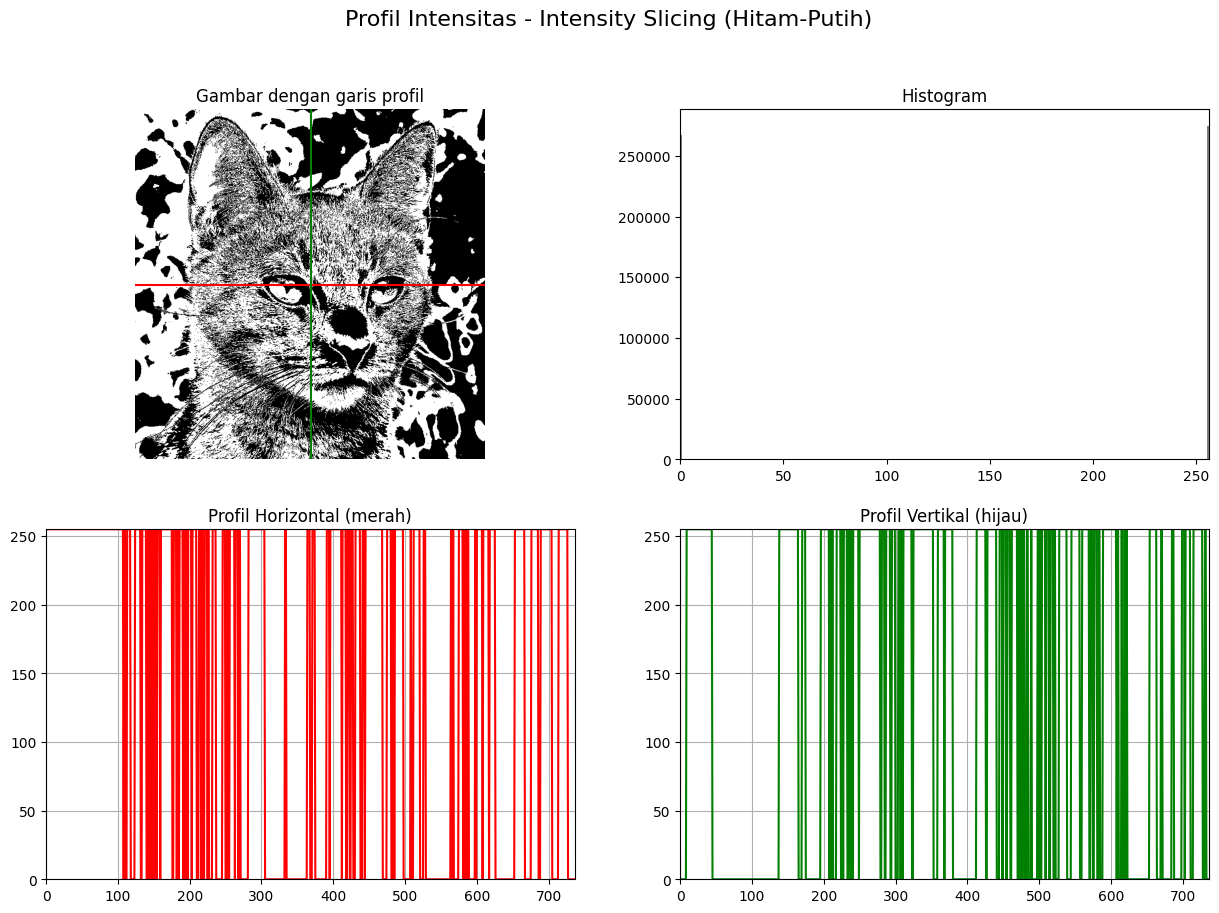

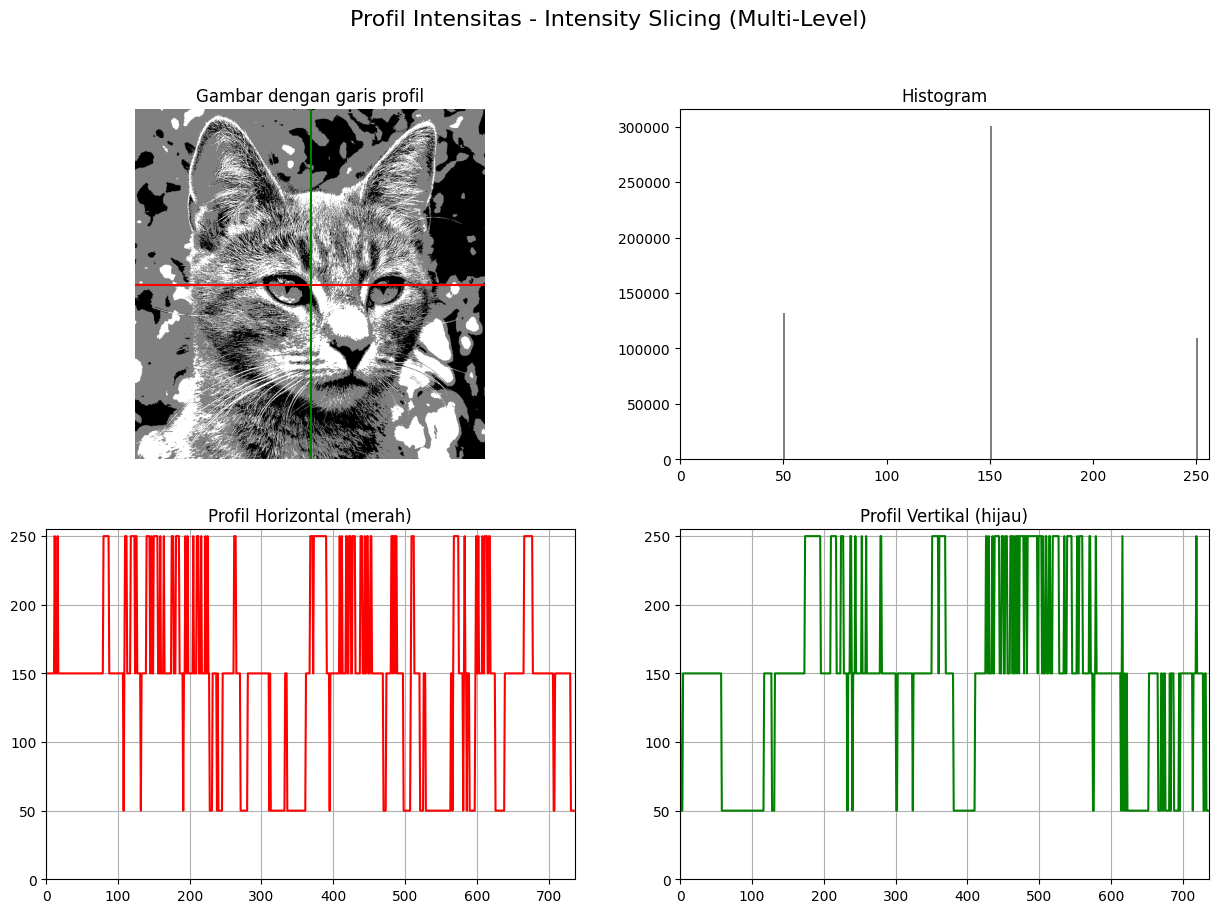

In [26]:
show_profile_lines(gray_image, 'Gambar Asli')
show_profile_lines(stretched_image, 'Contrast Stretching')
show_profile_lines(slice_highlight, 'Intensity Slicing (Highlight)')
show_profile_lines(slice_bw, 'Intensity Slicing (Hitam-Putih)')
show_profile_lines(slice_multi, 'Intensity Slicing (Multi-Level)')

In [30]:
# Fungsi transformasi piecewise
def piecewise_linear_transform(image, control_points):
    """
    Melakukan transformasi piecewise linear umum pada gambar grayscale
    control_points: list of tuples [(r1,s1), (r2,s2), ...] yang mendefinisikan titik kontrol
                   dimana r adalah nilai input dan s adalah nilai output
    """
    control_points.sort(key=lambda x: x[0])
    
    assert control_points[0][0] == 0, "Titik kontrol pertama harus dimulai dari r=0"
    assert control_points[-1][0] == 255, "Titik kontrol terakhir harus berakhir pada r=255"
    
    lut = np.zeros(256, dtype=np.uint8)
    for i in range(len(control_points)-1):
        r1, s1 = control_points[i]
        r2, s2 = control_points[i+1]
        
        if r2 == r1:
            lut[r1:r2+1] = s1
        else:
            for r in range(r1, r2+1):
                s = s1 + (s2 - s1) * (r - r1) / (r2 - r1)
                lut[r] = int(s)
                
    return cv2.LUT(image, lut)

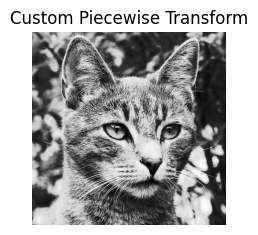

In [31]:
# Transformasi piecewise khusus untuk efek kontras
custom_transform = piecewise_linear_transform(gray_image, [(0,0), (100,50), (150,200), (255,255)])

plt.subplot(236)
plt.title('Custom Piecewise Transform')
plt.imshow(custom_transform, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()